In [1]:
%matplotlib inline

import sys
sys.path.append("../../")

from train_model import train

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

In [2]:
hyperparameter={
"num_nearest":60,
"sigma":10,
"learning_rate":0.0019,
"batch_size":250,
"num_neuron":60,
"num_layers":3,
"size_embedded":50,
"num_nearest_geo":20,
"num_nearest_eucli":20,
"id_dataset":'fc',
"epochs":300,
"optimier":'adam',
"validation_split":0.1,
"label":'asi_fc',
"early_stopping": False,
"graph_label":'matrix',
}

# Model

In [3]:
spatial = train(**hyperparameter)

In [4]:
dataset,\
result,\
fit,\
embedded_train,\
embedded_test,\
predict_regression_train,\
predict_regression_test = spatial()

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Epoch 1/300
240/240 [==============================] - 2s 5ms/step - loss: 0.9354 - root_mean_squared_error: 2.5969 - val_loss: 0.1184 - val_root_mean_squared_error: 0.1849

Epoch 00001: val_loss improved from inf to 0.11835, saving model to /home/wslkoen/uni/semester3/uc/UC_Project_HPP/output/models/fc/asi_fc_weights.hdf5
Epoch 2/300
240/240 [==============================] - 1s 4ms/step - loss: 0.1269 - root_mean_squared_error: 0.1961 - val_loss: 0.1114 - val_root_mean_squared_error: 0.1747

Epoch 00002: val_loss improved from 0.11835 to 0.11135, saving model to /home/wslkoen/uni/semester3/uc/UC_Project_HPP/output/models/fc/asi_fc_weights.hdf5
Epoch 3/300
240/240 [==============================] - 1s 4ms/step - loss: 0.1200 - root_mean_squared_error: 0.1864 - val_loss: 0.1219 - val_root_mean_squared_error: 0.1811

Ep

In [5]:
print('################# Test ##########################')
print('MALE test:.... {}'.format(result[0]))
print('RMSE test:.... {}'.format(result[1]))
print('MAPE test:.... {}'.format(result[2]))
print('################# Train ##########################')
print('MALE train:.... {}'.format(result[3]))
print('RMSE train:.... {}'.format(result[4]))
print('MAPE train:.... {}'.format(result[5]))

################# Test ##########################
MALE test:.... 0.09765557702184151
RMSE test:.... 22986.49335585145
MAPE test:.... 6.3072315221277
################# Train ##########################
MALE train:.... 0.0932067319832857
RMSE train:.... 21915.228254476555
MAPE train:.... 5.988083962116029


# Display Model Training History

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


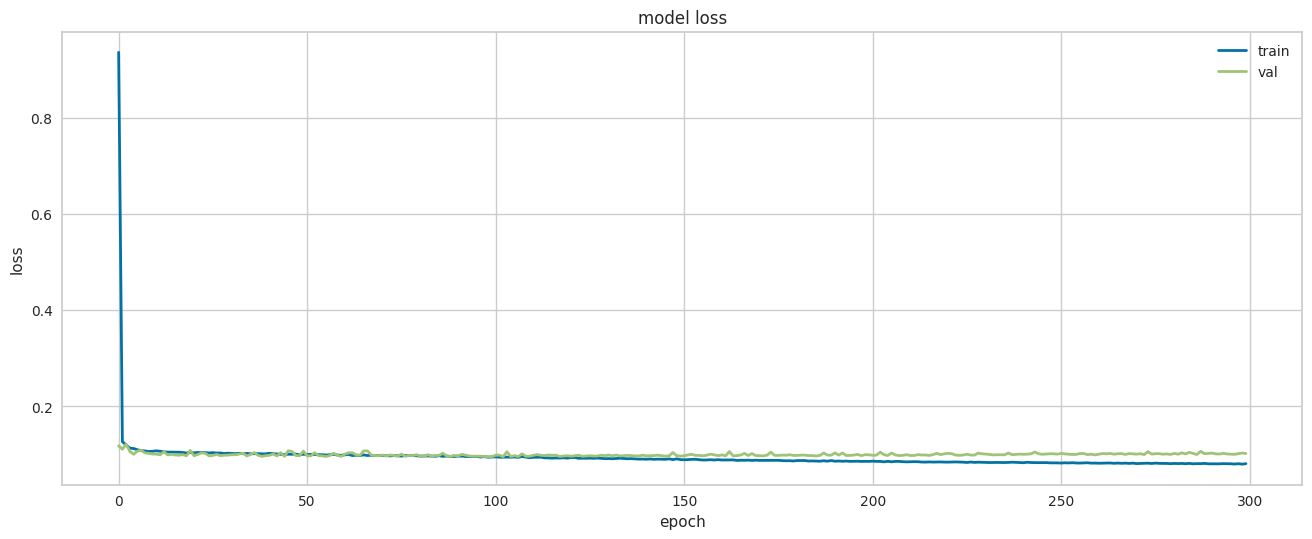

In [6]:
rcParams['figure.figsize'] = (16, 6)
# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Residue

## Raw

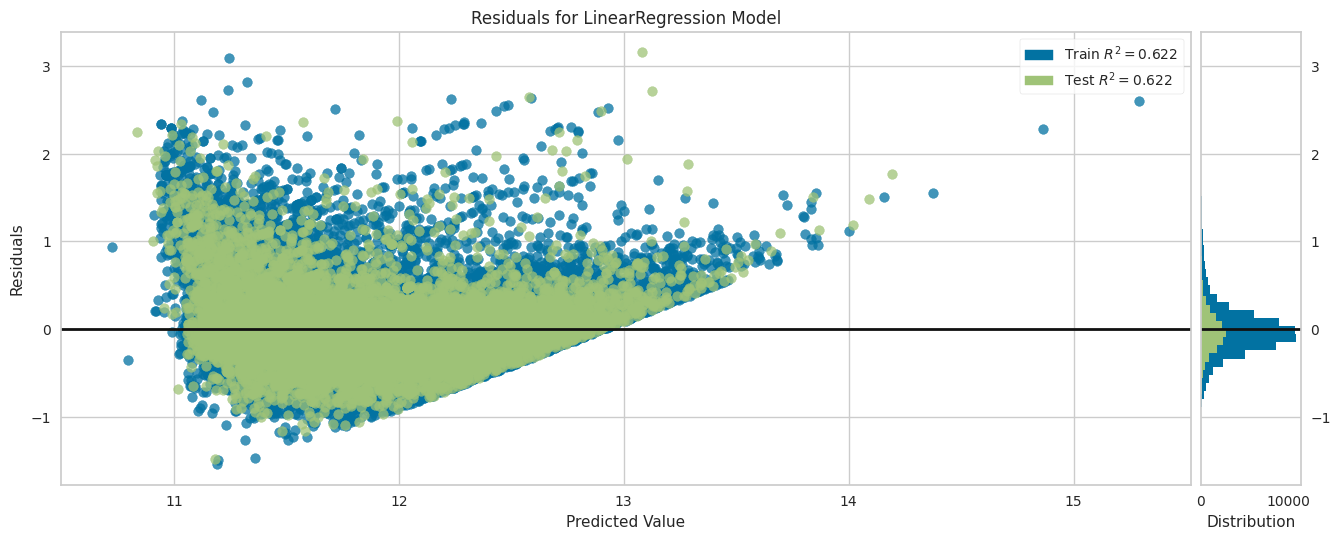

In [7]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the model
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
visualizer.poof();                   # Draw/show/poof the data

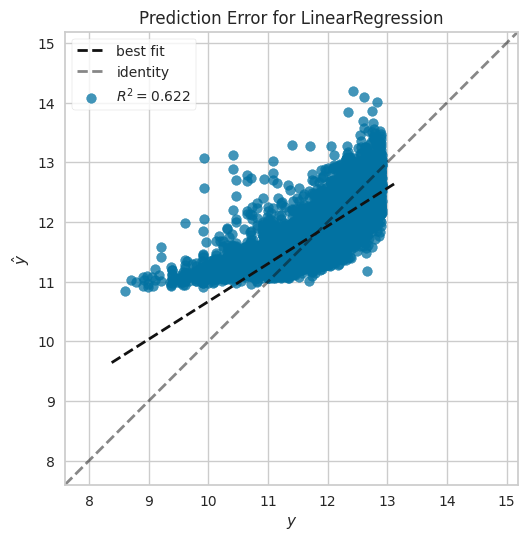

In [8]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the visualizer
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
g = visualizer.poof();            # Draw/show/poof the data

## Embedded

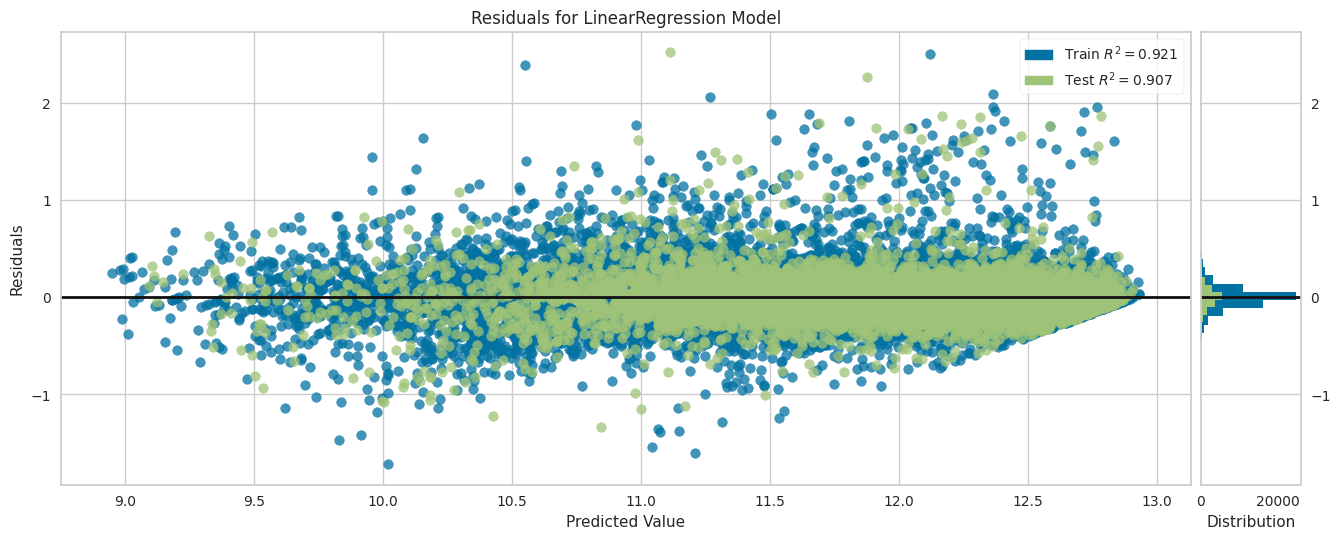

In [9]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the model
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
visualizer.poof();                 # Draw/show/poof the data

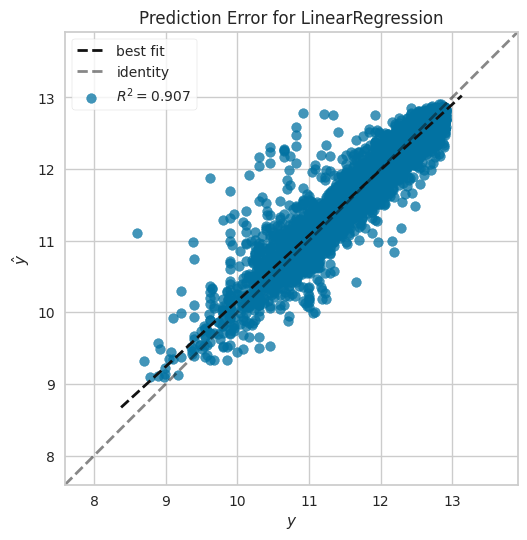

In [10]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the visualizer
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data